# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data


Part 2: Data Inspection, Cleaning and Wrangling in Python

*Mark Bauer*

Table of Contents
=================

   * [Getting Started](#-Getting-Started:-Accessing-the-Building-Footprints-Dataset)
       * [Reading in data as csv in static form](##-Reading-in-data-as-csv-in-static-form)
       
       
   * [1. Importing Libraries](##-1.-Importing-Libraries)

       
   * [2. Reading in data as a pandas dataframe](#-2.-Reading-in-data-as-a-pandas-dataframe)
       
   
   * [3. Data Inspection](#-3.-Data-Inspection)
       * [3.1 Previewing Data](##-3.1-Previewing-Data)
       * [3.2 Calcualting Summary Statistics](##-3.2-Calcualting-Summary-Statistics)
       * [3.3 Identifying Null/NA Values](##-3.3-Identifying-Null/NA-Values)
       
       
   * [4. Data Cleaning/Wrangling](#-4.-Data-Cleaning/Wrangling)
       * [4.1 Previewing Column Values](##-4.1-Previewing-Column-Values)
       * [4.2 Filling In Null/NA Values With Median ](##-4.2-Filling-In-Null/NA-Values-With-Median)
       * [4.3 Plotting Histogram of Raw Construction Year Values](##-4.3-Plotting-Histogram-of-Raw-Construction-Year-Values)   
       * [4.4 Identiyfying Values Not Between Years 1 and 2020](##-4.4-Identiyfying-Values-Not-Between-Years-1-and-2020)
       * [4.5 Replacing Values Not Between Years 1 and 2020 with the Median](##-4.5-Replacing-Values-Not-Between-Years-1-and-2020-with-the-Median)
       * [4.6 Plotting Histogram of Construction Years Between 1 and 2020](##-4.6-Plotting-Histogram-of-Construction-Years-Between-1-and-2020)
       * [4.7 Identifying Buildings Built Before 1652 - Possible Outliers](##-4.7-Identifying-Buildings-Built-Before-1652---Possible-Outliers)
       * [4.8 Replacing Values Less Than 1652 with the Median](##-4.8-Replacing-Values-Less-Than-1652-with-the-Median)
       * [4.9 Plotting Histogram of Construction Years with Cleaned Column](##-4.9-Plotting-Histogram-of-Construction-Years-with-Cleaned-Column)
       
       
   * [5. Detecting Outliers](#-5.-Detecting-Outliers)
       * [5.1. Making a Box Plot](#-5.1-Making-a-Box-Plot)
           * [5.1.1 Calculating Interquartile Range (IQR)](##-5.1.1-Calculating-Interquartile-Range-(IQR))
           * [5.1.2 Box Plot of Construction Year Values](##-5.1.2-Box-Plot-of-Construction-Year-Values)
           * [5.1.3 Making Histograms of Values Above and Below Box Plot Whiskers](##-5.1.3-Making-Histograms-of-Values-Above-and-Below-Box-Plot-Whiskers)
       * [5.2 Z-Scores](#-5.2-Z-Scores)
           * [5.2.1 Calculating Z-Scores](##-5.2.1-Calculating-Z-Scores)
           * [5.2.2 Identifying Possible Outliers from Z-Score](##-5.2.2-Identifying-Possible-Outliers-from-Z-Score)
           * [5.2.3 Making Histograms of Construction Year Raw and Normalized (Z-Score) Values](##-5.2.3-Making-Histograms-of-Construction-Year-Raw-and-Normalized-%29Z-Score%29-Values)    
       
       
   * [6. Conclusion](#-4.-Conclusion)

**Goal:** In this notebook, we will review various ways to to inspect, clean, wrangle, and detect any outliers in your data.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Getting Started: Accessing the Building Footprints Dataset

## Reading in data as csv in static form

Copy this link address shown below.

![building_footprints_csv](images/building-footprints-csv.png)

## Dataset Web Page Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

## Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt

# to plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%load_ext watermark

%watermark -v -p numpy,pandas,matplotlib.pyplot

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib.pyplot 3.1.1


Documention for installing watermark: https://github.com/rasbt/watermark

# 2. Reading in data as a pandas dataframe

If you receive `HTTPError: HTTP Error 404: Not Found`, you need to replace the csv link. DoITT changes the link path regularly.

In [4]:
# setting the link of our data (a static csv file) as the name 'url'
url = 'https://data.cityofnewyork.us/api/views/4zxm-zkth/rows.csv?accessType=DOWNLOAD'

# reading in our data as a pandas dataframe and setting the name to'building_footprints'
building_footprints = pd.read_csv(url)

# 3. Data Inspection

## 3.1 Previewing Data

In [5]:
# previewing the first five rows of our dataframe
building_footprints.head()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.87129515296562 40.65717370...,2009.0,NaN,3394646,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3.044521e+09,3.044521e+09,Photogramm
1,MULTIPOLYGON (((-73.87670970144625 40.71425234...,1930.0,NaN,4548330,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4.030640e+09,4.030640e+09,Photogramm
2,MULTIPOLYGON (((-73.85195485799383 40.66235471...,1960.0,NaN,4460479,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4.139430e+09,4.139430e+09,Photogramm
3,MULTIPOLYGON (((-73.94029215265738 40.64108287...,1920.0,NaN,3355684,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3.049720e+09,3.049720e+09,Photogramm
4,MULTIPOLYGON (((-73.98998983552244 40.62383804...,1915.0,NaN,3131737,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3.055100e+09,3.055100e+09,Photogramm


In [6]:
# previewing the last five rows of our dataframe
building_footprints.tail()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1084954,MULTIPOLYGON (((-74.19445796227131 40.53927900...,1980.0,NaN,5081526,09/18/2020 12:00:00 AM +0000,Alteration,168284,35.0,2100.0,123.0,2869.317259,247.918686,5.063360e+09,5.063360e+09,Other (Man
1084955,MULTIPOLYGON (((-73.95732983152737 40.63563775...,2020.0,NaN,3426611,09/17/2020 12:00:00 AM +0000,Constructed,1293102,75.0,2100.0,26.0,3873.555738,292.361111,3.052200e+09,3.052200e+09,Other (Man
1084956,MULTIPOLYGON (((-73.86959847028427 40.65700259...,2017.0,NaN,3418144,09/17/2020 12:00:00 AM +0000,Constructed,1292611,15.0,2100.0,14.0,643.367828,106.263690,3.045861e+09,NaN,Other (Man
1084957,MULTIPOLYGON (((-74.19368057016453 40.53947895...,1980.0,NaN,5081529,09/18/2020 12:00:00 AM +0000,Alteration,308899,28.0,2100.0,120.0,2679.415233,216.697399,5.063360e+09,5.063360e+09,Other (Man
1084958,MULTIPOLYGON (((-74.19405636715909 40.53927738...,2020.0,NaN,5171437,09/18/2020 12:00:00 AM +0000,Constructed,1293108,34.0,2100.0,122.0,1650.589979,168.615080,5.063360e+09,5.063360e+09,Other (Man


In [7]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_footprints.shape

(1084959, 15)

In [8]:
# printing the columns our dataframe
building_footprints.columns

Index(['the_geom', 'CNSTRCT_YR', 'NAME', 'BIN', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE'],
      dtype='object')

In [9]:
# printing the data types of our columns
building_footprints.dtypes

the_geom       object
CNSTRCT_YR    float64
NAME           object
BIN             int64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA    float64
SHAPE_LEN     float64
BASE_BBL      float64
MPLUTO_BBL    float64
GEOMSOURCE     object
dtype: object

In [10]:
# printing the column names, non-null counts, and data types of our columns
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084959 entries, 0 to 1084958
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1084959 non-null  object 
 1   CNSTRCT_YR  1080078 non-null  float64
 2   NAME        1752 non-null     object 
 3   BIN         1084959 non-null  int64  
 4   LSTMODDATE  1084959 non-null  object 
 5   LSTSTATYPE  1084769 non-null  object 
 6   DOITT_ID    1084959 non-null  int64  
 7   HEIGHTROOF  1082294 non-null  float64
 8   FEAT_CODE   1084950 non-null  float64
 9   GROUNDELEV  1084430 non-null  float64
 10  SHAPE_AREA  1084959 non-null  float64
 11  SHAPE_LEN   1084959 non-null  float64
 12  BASE_BBL    1084957 non-null  float64
 13  MPLUTO_BBL  1084423 non-null  float64
 14  GEOMSOURCE  1084741 non-null  object 
dtypes: float64(8), int64(2), object(5)
memory usage: 124.2+ MB


## 3.2 Calcualting Summary Statistics

In [11]:
# printing descriptive statistics of our numeric columns in our data
building_footprints.describe()

,CNSTRCT_YR,BIN,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.080078e+06,1.084959e+06,1.084959e+06,1.082294e+06,1.084950e+06,1.084430e+06,1.084959e+06,1.084959e+06,1.084957e+06,1.084423e+06
mean,1.946634e+03,3.710141e+06,5.909110e+05,2.754626e+01,2.698625e+03,5.509883e+01,1.596715e+03,1.553100e+02,3.561975e+09,3.561808e+09
std,1.924304e+04,1.026815e+06,3.592553e+05,2.131574e+01,1.202283e+03,4.150831e+01,5.600723e+03,1.271423e+02,9.860708e+08,9.861026e+08
min,0.000000e+00,1.000002e+06,1.000000e+00,0.000000e+00,0.000000e+00,-1.400000e+01,3.247526e+01,2.373699e+01,3.064269e+06,3.064269e+06
25%,1.920000e+03,3.128576e+06,2.865335e+05,1.834000e+01,2.100000e+03,2.500000e+01,6.520730e+02,1.096924e+02,3.043170e+09,3.043160e+09
50%,1.930000e+03,4.066817e+06,5.732300e+05,2.610000e+01,2.100000e+03,4.600000e+01,9.572074e+02,1.379178e+02,4.019280e+09,4.019180e+09
75%,1.955000e+03,4.481724e+06,8.615195e+05,3.109511e+01,2.100000e+03,7.400000e+01,1.320289e+03,1.644478e+02,4.106720e+09,4.106680e+09
max,1.999998e+07,5.799523e+06,1.293109e+06,1.550000e+03,5.110000e+03,5.560000e+02,1.171874e+06,2.001729e+04,6.000000e+09,6.000000e+09


In [12]:
# calculating the median value in each columns
# this can also be found with the describe method above at the 50% index/row
building_footprints.median()

CNSTRCT_YR    1.930000e+03
BIN           4.066817e+06
DOITT_ID      5.732300e+05
HEIGHTROOF    2.610000e+01
FEAT_CODE     2.100000e+03
GROUNDELEV    4.600000e+01
SHAPE_AREA    9.572074e+02
SHAPE_LEN     1.379178e+02
BASE_BBL      4.019280e+09
MPLUTO_BBL    4.019180e+09
dtype: float64

In [13]:
# compute pairwise correlation of columns, excluding NA/null values
building_footprints.corr()

,CNSTRCT_YR,BIN,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
CNSTRCT_YR,1.000000,0.001861,0.001763,0.000773,-0.000746,0.000506,-0.000433,-0.000793,0.001981,0.001980
BIN,0.001861,1.000000,0.155983,-0.360692,0.190310,0.086523,-0.101138,-0.216160,0.988708,0.988716
DOITT_ID,0.001763,0.155983,1.000000,-0.177097,0.551449,-0.016658,-0.038350,-0.161292,0.075657,0.075412
HEIGHTROOF,0.000773,-0.360692,-0.177097,1.000000,-0.364620,-0.001072,0.278922,0.443686,-0.329833,-0.330034
FEAT_CODE,-0.000746,0.190310,0.551449,-0.364620,1.000000,0.001108,-0.107474,-0.311469,0.089235,0.089367
GROUNDELEV,0.000506,0.086523,-0.016658,-0.001072,0.001108,1.000000,-0.020149,-0.005314,0.105542,0.105771
SHAPE_AREA,-0.000433,-0.101138,-0.038350,0.278922,-0.107474,-0.020149,1.000000,0.784640,-0.095597,-0.095562
SHAPE_LEN,-0.000793,-0.216160,-0.161292,0.443686,-0.311469,-0.005314,0.784640,1.000000,-0.190967,-0.190946
BASE_BBL,0.001981,0.988708,0.075657,-0.329833,0.089235,0.105542,-0.095597,-0.190967,1.000000,0.999996
MPLUTO_BBL,0.001980,0.988716,0.075412,-0.330034,0.089367,0.105771,-0.095562,-0.190946,0.999996,1.000000


## 3.3 Identifying Null/NA Values

This is a *very important* step that is often overlooked. We don't want to perform any statistics on columns with null values.

In [14]:
# printing the number of null/na values in each column
building_footprints.isna().sum()

the_geom            0
CNSTRCT_YR       4881
NAME          1083207
BIN                 0
LSTMODDATE          0
LSTSTATYPE        190
DOITT_ID            0
HEIGHTROOF       2665
FEAT_CODE           9
GROUNDELEV        529
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            2
MPLUTO_BBL        536
GEOMSOURCE        218
dtype: int64

In [15]:
# printing the total amount of null/na values in our data
building_footprints.isnull().sum().sum()

1092237

# 4. Data Cleaning/Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## 4.1 Previewing Column Values

In [16]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
222836,MULTIPOLYGON (((-73.84973284797533 40.72102428...,0.0,NaN,4591428,08/17/2017 12:00:00 AM +0000,Constructed,340320,16.190000,5110.0,59.0,379.795077,83.674116,4.032340e+09,4.032340e+09,Other (Man
830563,MULTIPOLYGON (((-73.86860840293613 40.84709033...,0.0,NaN,2120180,08/22/2017 12:00:00 AM +0000,Constructed,1115479,14.537168,2100.0,62.0,4918.047984,286.312617,2.040110e+09,2.040110e+09,Other (Man
830544,MULTIPOLYGON (((-74.12302389786203 40.59408122...,0.0,NaN,5154839,12/08/2016 12:00:00 AM +0000,Constructed,1026107,10.380000,2100.0,280.0,515.810631,115.169367,5.009290e+09,5.009290e+09,Photogramm
313718,MULTIPOLYGON (((-73.7993603831876 40.680488481...,0.0,NaN,4538834,12/07/2018 12:00:00 AM +0000,Constructed,1107015,23.957158,2100.0,39.0,606.799608,112.490940,4.120000e+09,4.120000e+09,Other (Man
830314,MULTIPOLYGON (((-74.07422300270187 40.62549313...,0.0,NaN,5166116,09/11/2015 12:00:00 AM +0000,Constructed,1246338,10.368076,2100.0,25.0,365.567572,96.331160,5.004960e+09,5.004960e+09,Photogramm


In [17]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in descending order
building_footprints.sort_values('CNSTRCT_YR',ascending=False).head()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1056729,MULTIPOLYGON (((-74.16106976376206 40.58166589...,19999979.0,NaN,5171292,01/22/2019 12:00:00 AM +0000,Constructed,1287742,43.53,2100.0,68.0,347.824676,75.359453,5.024500e+09,5.024508e+09,Other (Man
841114,MULTIPOLYGON (((-74.144838646532 40.6162472403...,20115.0,NaN,5165187,12/05/2019 12:00:00 AM +0000,Constructed,1291251,31.00,2100.0,40.0,1124.997132,139.999793,5.004770e+09,5.004770e+09,Other (Man
518264,MULTIPOLYGON (((-74.13682929776881 40.61168969...,20004.0,NaN,5018663,08/16/2019 12:00:00 AM +0000,Constructed,1288905,28.40,2100.0,89.0,702.366326,127.116855,5.007350e+09,5.007350e+09,Other (Man
64084,MULTIPOLYGON (((-73.90852861892834 40.82877161...,20000.0,NaN,2129310,11/05/2018 12:00:00 AM +0000,Constructed,1285830,10.00,1000.0,32.0,373.098721,86.566495,2.023880e+09,2.023880e+09,Other (Man
743353,MULTIPOLYGON (((-73.988920998115 40.7645846572...,20000.0,NaN,1082416,03/09/2018 12:00:00 AM +0000,Alteration,97464,74.21,2100.0,52.0,3678.718152,298.769770,1.010610e+09,1.010610e+09,Other (Man


In [18]:
# return counts of unique values in descending order of our'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].value_counts()

1920.0        131445
1930.0        113707
1925.0        109705
1950.0         63008
1910.0         52948
               ...  
202.0              1
1803.0             1
1809.0             1
1811.0             1
19999979.0         1
Name: CNSTRCT_YR, Length: 252, dtype: int64

In [19]:
# return counts of unique values but sorted by our index - 'CNSTRCT_YR' column values
building_footprints['CNSTRCT_YR'].value_counts().sort_index()

0.0           6142
202.0            1
1652.0           1
1661.0           2
1665.0           1
              ... 
2020.0         394
20000.0          2
20004.0          1
20115.0          1
19999979.0       1
Name: CNSTRCT_YR, Length: 252, dtype: int64

In [20]:
# summing all the null/na values in our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

4881

One of my favorite pandas methods is `pd.to_numeric()`. We set `errors='coerce'` so any value that can not be converted to an integer returns 'NaN.' And then, you guest it, we can fill in these NaN values.

In [21]:
# converting all the values in our 'CNSTRCT_YR' column as integers
# invalid conversions will be set as NaN with errors='coerce'
pd.to_numeric(building_footprints['CNSTRCT_YR'], downcast='integer', errors='coerce')

0          2009.0
1          1930.0
2          1960.0
3          1920.0
4          1915.0
            ...  
1084954    1980.0
1084955    2020.0
1084956    2017.0
1084957    1980.0
1084958    2020.0
Name: CNSTRCT_YR, Length: 1084959, dtype: float64

In [22]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

4881

In [23]:
# printing the mean and median of the 'CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].mean())
print(building_footprints['CNSTRCT_YR'].median())

1946.6336005362575
1930.0


## 4.2 Filling In Null/NA Values With Median 

Since our data has numerous incorrect values, we will fill values with NaN with the median.

In [24]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_footprints['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_footprints["CNSTRCT_YR"] = building_footprints["CNSTRCT_YR"].fillna(value=median)
building_footprints.head()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.87129515296562 40.65717370...,2009.0,NaN,3394646,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3.044521e+09,3.044521e+09,Photogramm
1,MULTIPOLYGON (((-73.87670970144625 40.71425234...,1930.0,NaN,4548330,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4.030640e+09,4.030640e+09,Photogramm
2,MULTIPOLYGON (((-73.85195485799383 40.66235471...,1960.0,NaN,4460479,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4.139430e+09,4.139430e+09,Photogramm
3,MULTIPOLYGON (((-73.94029215265738 40.64108287...,1920.0,NaN,3355684,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3.049720e+09,3.049720e+09,Photogramm
4,MULTIPOLYGON (((-73.98998983552244 40.62383804...,1915.0,NaN,3131737,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3.055100e+09,3.055100e+09,Photogramm


In [25]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

0

In [26]:
# casting our 'CNSTRCT_YR' column as an integer datatype
building_footprints.astype({'CNSTRCT_YR': 'int32'}).dtypes

the_geom       object
CNSTRCT_YR      int32
NAME           object
BIN             int64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA    float64
SHAPE_LEN     float64
BASE_BBL      float64
MPLUTO_BBL    float64
GEOMSOURCE     object
dtype: object

In [27]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
715518,MULTIPOLYGON (((-73.82396887986631 40.69552252...,0.0,NaN,4589042,07/24/2014 12:00:00 AM +0000,Constructed,806767,19.390000,2100.0,57.0,2906.956090,216.820368,4.093750e+09,4.093750e+09,Photogramm
31899,MULTIPOLYGON (((-73.92911942073772 40.70505033...,0.0,NaN,3400405,11/17/2017 12:00:00 AM +0000,Constructed,1255009,13.448280,2100.0,25.0,2433.201127,211.329538,3.030140e+09,3.030140e+09,Other (Man
75625,MULTIPOLYGON (((-74.23997406812904 40.49951273...,0.0,NaN,5166421,06/13/2018 12:00:00 AM +0000,Constructed,1272698,NaN,2100.0,8.0,602.033778,111.772387,5.078800e+09,5.078800e+09,Other (Man
167839,MULTIPOLYGON (((-73.87506878374307 40.82236561...,0.0,NaN,2022600,08/22/2017 12:00:00 AM +0000,Constructed,162280,21.020000,5110.0,15.0,55089.695769,939.508993,2.036530e+09,2.036530e+09,Photogramm
104970,MULTIPOLYGON (((-73.77875175060497 40.66633622...,0.0,NaN,4617451,09/11/2017 12:00:00 AM +0000,Constructed,1243915,15.229623,2100.0,13.0,1072.425418,143.340320,4.132670e+09,4.132670e+09,Photogramm


## 4.3 Plotting Histogram of Raw Construction Year Values

Text(0.5, 1.0, 'Histogram of Construction Year Values')

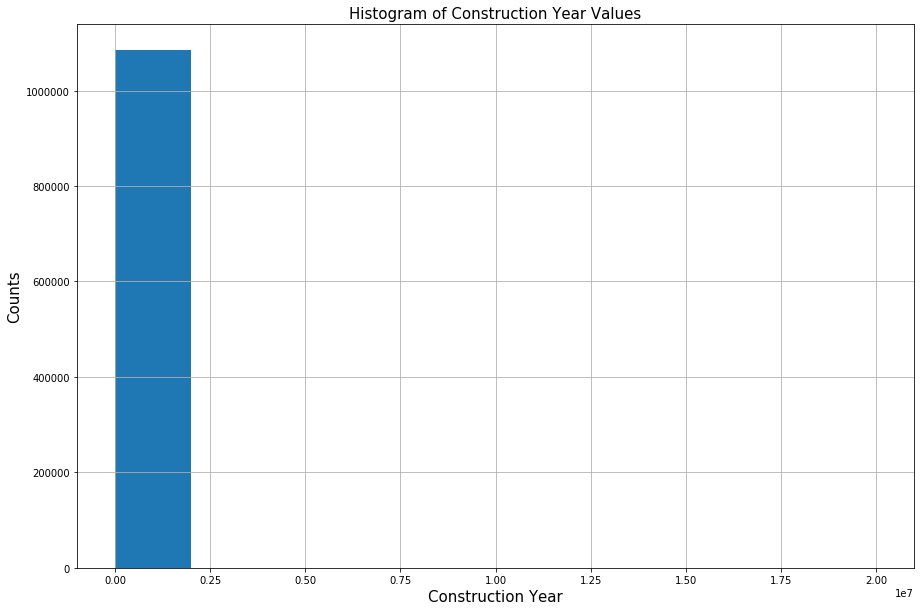

In [28]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

In [29]:
# printing the max and min values of our CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].max())
print(building_footprints['CNSTRCT_YR'].min())

19999979.0
0.0


## 4.4 Identiyfying Values Not Between Years 1 and 2020

In [30]:
# previewing the first five rows of values not (i.e. ~) between 1 and 2020 in our data
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)].head()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
50,MULTIPOLYGON (((-73.98260213243807 40.66219192...,0.0,NaN,3396049,12/07/2018 12:00:00 AM +0000,Constructed,1098656,64.34975,2100.0,153.0,5670.027484,339.330474,3.011040e+09,3.011040e+09,Photogramm
172,MULTIPOLYGON (((-73.88298274971864 40.81517278...,0.0,NaN,2098658,08/22/2017 12:00:00 AM +0000,Constructed,441521,18.40000,2100.0,23.0,1614.466219,176.130060,2.027640e+09,2.027640e+09,Photogramm
934,MULTIPOLYGON (((-73.80705540401291 40.66400343...,0.0,NaN,4594704,08/22/2017 12:00:00 AM +0000,Constructed,367831,43.10980,2100.0,13.0,12451.758982,692.645592,4.119000e+09,4.119000e+09,Other (Man
995,MULTIPOLYGON (((-73.94343801996024 40.62077805...,0.0,NaN,3209687,12/07/2018 12:00:00 AM +0000,Constructed,801244,27.16000,2100.0,24.0,857.225891,135.011032,3.076500e+09,3.076500e+09,Photogramm
1005,MULTIPOLYGON (((-73.97720397258655 40.58652267...,0.0,NaN,3412431,11/15/2016 12:00:00 AM +0000,Constructed,1222091,11.65000,2100.0,10.0,577.522408,113.491237,3.072080e+09,3.072080e+09,Photogramm


In [31]:
# printing the number of rows and columns of values in 'CNSTRCT_YR' column not between 1 and 2020
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020, inclusive=True)].shape

(6147, 15)

## 4.5 Replacing Values Not Between Years 1 and 2020 with the Median

In [32]:
# identifying values not between 1 and 2020 and saving as the name 'replace'
replace = building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)]
# replacing not between 1 and 2020 with the median as the name 'replacement_value'
replacement_value = building_footprints['CNSTRCT_YR'].median()

building_footprints[['CNSTRCT_YR']] = building_footprints[['CNSTRCT_YR']].replace(replace, replacement_value)

In [33]:
# previewing the first five rows of values not (i.e. ~) between 1 and 2020 in our data
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)].head()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE


In [34]:
# printing the number of rows and columns of values in CNSTRCT_YR' column not between 1 and 2020
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)].shape

(0, 15)

In [35]:
# printing descriptive statistics of our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].describe()

count    1.084959e+06
mean     1.938986e+03
std      2.873383e+01
min      2.020000e+02
25%      1.920000e+03
50%      1.930000e+03
75%      1.955000e+03
max      2.020000e+03
Name: CNSTRCT_YR, dtype: float64

## 4.6 Plotting Histogram of Construction Years Between 1 and 2020

Text(0.5, 1.0, 'Histogram of Construction Year Values')

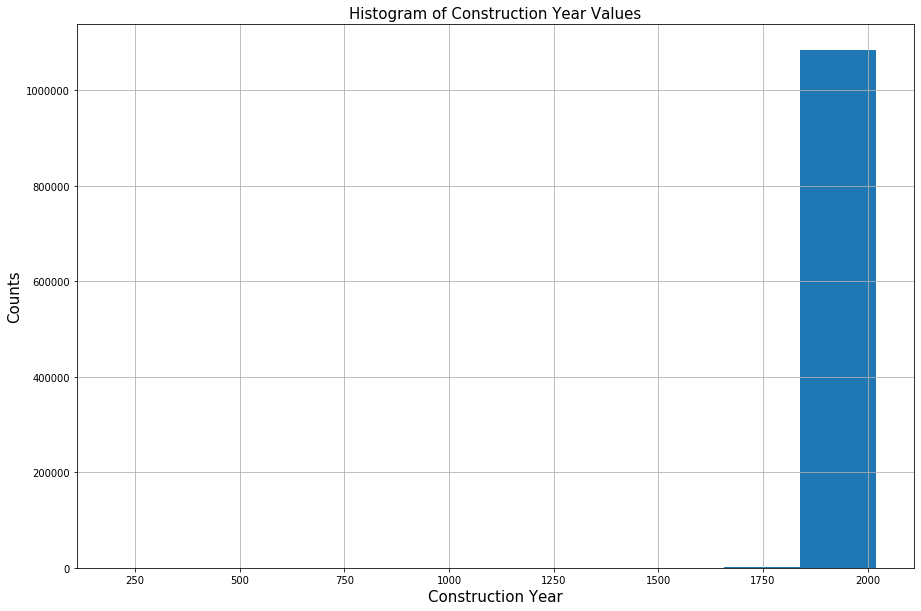

In [36]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

In [37]:
# printing the first 20 rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head(20)

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1083981,MULTIPOLYGON (((-73.85862589920973 40.72962642...,202.0,NaN,4622920,04/23/2020 12:00:00 AM +0000,Marked for Construction,1292435,NaN,1003.0,40.0,1251.090432,163.221642,4.020910e+09,4.020910e+09,Other (Man
1079368,MULTIPOLYGON (((-73.92083460429942 40.64439765...,1652.0,Pieter Claesen Wyckoff House,3221967,01/28/2020 12:00:00 AM +0000,Constructed,550741,24.540000,2100.0,14.0,2214.189137,208.884085,3.079170e+09,3.079170e+09,Photogramm
801841,MULTIPOLYGON (((-73.8247828135812 40.762948467...,1661.0,Bowne House,4113403,08/22/2017 12:00:00 AM +0000,Constructed,776399,26.120000,2100.0,64.0,2814.439349,242.381274,4.050130e+09,4.050130e+09,Photogramm
483069,MULTIPOLYGON (((-73.82449114078894 40.76279389...,1661.0,NaN,4610542,08/17/2017 12:00:00 AM +0000,Constructed,1190137,14.846959,5110.0,63.0,571.057794,112.944873,4.050130e+09,4.050130e+09,Photogramm
964878,MULTIPOLYGON (((-74.06383185277687 40.61463876...,1665.0,NaN,5130548,08/22/2017 12:00:00 AM +0000,Constructed,160094,32.570000,2100.0,38.0,3580.967750,308.578271,5.028300e+09,5.028300e+09,Photogramm
1083906,MULTIPOLYGON (((-74.25311647359251 40.50309522...,1680.0,Conference House,5087656,04/13/2020 12:00:00 AM +0000,Constructed,702698,38.640000,2100.0,38.0,2051.848904,181.231385,5.078570e+09,5.078570e+09,Photogramm
1083915,MULTIPOLYGON (((-74.06293248238293 40.61512359...,1690.0,Alice Austen House Museum,5042188,04/13/2020 12:00:00 AM +0000,Alteration,806241,22.260000,2100.0,21.0,2643.246683,249.017591,5.028300e+09,5.028300e+09,Photogramm
1080978,MULTIPOLYGON (((-73.83018115607636 40.76296466...,1694.0,NaN,4112345,01/28/2020 12:00:00 AM +0000,Constructed,101470,40.050000,2100.0,24.0,3302.526302,238.863553,4.049770e+09,4.049770e+09,Photogramm
644658,MULTIPOLYGON (((-73.87809412136981 40.73834078...,1706.0,NaN,4539447,08/22/2017 12:00:00 AM +0000,Constructed,1255838,13.250610,2100.0,26.0,2695.667896,208.568070,4.015490e+09,4.015490e+09,Other (Man
246330,MULTIPOLYGON (((-73.87747039074847 40.73837525...,1706.0,NaN,4038764,08/22/2017 12:00:00 AM +0000,Constructed,150331,37.280000,2100.0,25.0,2619.408603,241.003409,4.015490e+09,4.015490e+09,Photogramm


## 4.7 Identifying Buildings Built Before 1652 - Possible Outliers

In [38]:
# returning the rows of which  the 'CNSTRCT_YR' is less than 1652
# I am using '1652' because this ism most likely the oldest building in this dataset 
building_footprints[building_footprints['CNSTRCT_YR'] < 1652]

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1083981,MULTIPOLYGON (((-73.85862589920973 40.72962642...,202.0,NaN,4622920,04/23/2020 12:00:00 AM +0000,Marked for Construction,1292435,NaN,1003.0,40.0,1251.090432,163.221642,4.020910e+09,4.020910e+09,Other (Man


In [39]:
# printing the median of the 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].median()

1930.0

## 4.8 Replacing Values Less Than 1652 with the Median

In [40]:
# identifying values less than 1652 to be replaced as the name 'replace'
replace = building_footprints[building_footprints['CNSTRCT_YR'] < 1652]
# saving the median as the name 'replacement_value' 
replacement_value = building_footprints['CNSTRCT_YR'].median()

# replacing these values with the column's median 
building_footprints[['CNSTRCT_YR']] = building_footprints[['CNSTRCT_YR']].replace(replace, replacement_value)

In [41]:
# performing a sanity check and looking at the first record (i.e. 62757) of our data and see if the old value
# of 216 has been replaced with 1930
building_footprints.loc[62757].head()

the_geom      MULTIPOLYGON (((-73.8540959118754 40.662971736...
CNSTRCT_YR                                                 1958
NAME                                                        NaN
BIN                                                     4434910
LSTMODDATE                         11/28/2018 12:00:00 AM +0000
Name: 62757, dtype: object

In [42]:
# printing the first 5 rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1079368,MULTIPOLYGON (((-73.92083460429942 40.64439765...,1652.0,Pieter Claesen Wyckoff House,3221967,01/28/2020 12:00:00 AM +0000,Constructed,550741,24.540000,2100.0,14.0,2214.189137,208.884085,3.079170e+09,3.079170e+09,Photogramm
801841,MULTIPOLYGON (((-73.8247828135812 40.762948467...,1661.0,Bowne House,4113403,08/22/2017 12:00:00 AM +0000,Constructed,776399,26.120000,2100.0,64.0,2814.439349,242.381274,4.050130e+09,4.050130e+09,Photogramm
483069,MULTIPOLYGON (((-73.82449114078894 40.76279389...,1661.0,NaN,4610542,08/17/2017 12:00:00 AM +0000,Constructed,1190137,14.846959,5110.0,63.0,571.057794,112.944873,4.050130e+09,4.050130e+09,Photogramm
964878,MULTIPOLYGON (((-74.06383185277687 40.61463876...,1665.0,NaN,5130548,08/22/2017 12:00:00 AM +0000,Constructed,160094,32.570000,2100.0,38.0,3580.967750,308.578271,5.028300e+09,5.028300e+09,Photogramm
1083906,MULTIPOLYGON (((-74.25311647359251 40.50309522...,1680.0,Conference House,5087656,04/13/2020 12:00:00 AM +0000,Constructed,702698,38.640000,2100.0,38.0,2051.848904,181.231385,5.078570e+09,5.078570e+09,Photogramm


In [43]:
# printing the first 5 rows of our data sorted by the 'CNSTRCT_YR' column in descending order
building_footprints.sort_values('CNSTRCT_YR',ascending=False).head()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1084958,MULTIPOLYGON (((-74.19405636715909 40.53927738...,2020.0,NaN,5171437,09/18/2020 12:00:00 AM +0000,Constructed,1293108,34.0,2100.0,122.0,1650.589979,168.615080,5.063360e+09,5.063360e+09,Other (Man
1084121,MULTIPOLYGON (((-73.90893687955305 40.67512084...,2020.0,NaN,3426987,05/18/2020 12:00:00 AM +0000,Marked for Construction,1292496,NaN,1003.0,73.0,396.515189,93.590591,3.014420e+09,3.014420e+09,Other (Man
1084252,MULTIPOLYGON (((-73.95068721636177 40.71270923...,2020.0,NaN,3421698,06/29/2020 12:00:00 AM +0000,Constructed,1292643,50.0,2100.0,22.0,2062.829995,183.999358,3.027670e+09,NaN,Other (Man
1084254,MULTIPOLYGON (((-74.11662951600003 40.55782897...,2020.0,NaN,5170494,07/08/2020 12:00:00 AM +0000,Constructed,1292670,30.0,2100.0,10.0,937.023497,127.857539,5.046780e+09,5.046780e+09,Other (Man
1084256,MULTIPOLYGON (((-74.11653844940435 40.55791675...,2020.0,NaN,5170495,07/08/2020 12:00:00 AM +0000,Constructed,1292671,30.0,2100.0,10.0,918.200899,126.786386,5.046780e+09,5.046780e+09,Other (Man


## 4.9 Plotting Histogram of Construction Years with Cleaned Column

Text(0.5, 1.0, 'Histogram of Construction Year Values')

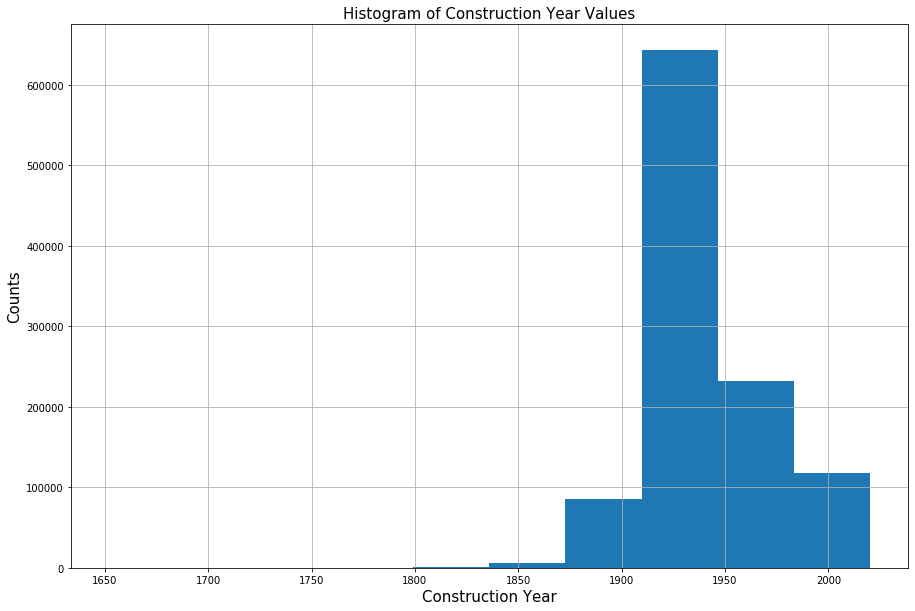

In [44]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

In [45]:
# printing descriptive statistics of our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].describe()

count    1.084959e+06
mean     1.938987e+03
std      2.868540e+01
min      1.652000e+03
25%      1.920000e+03
50%      1.930000e+03
75%      1.955000e+03
max      2.020000e+03
Name: CNSTRCT_YR, dtype: float64

In [46]:
# return counts of unique values in descending order of our'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].value_counts()

1920.0    131445
1930.0    124736
1925.0    109705
1950.0     63008
1910.0     52948
           ...  
1795.0         1
1797.0         1
1809.0         1
1811.0         1
1652.0         1
Name: CNSTRCT_YR, Length: 246, dtype: int64

In [47]:
# return counts of unique values of our 'CNSTRCT_YR' column sorted by 'CNSTRCT_YR'
building_footprints['CNSTRCT_YR'].value_counts().sort_index()

1652.0       1
1661.0       2
1665.0       1
1680.0       1
1690.0       1
          ... 
2016.0    1742
2017.0    1866
2018.0    2044
2019.0     795
2020.0     394
Name: CNSTRCT_YR, Length: 246, dtype: int64

In [48]:
# summing null/na values in our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

0

In [49]:
# printing descriptive statistics of our data 
building_footprints.describe()

,CNSTRCT_YR,BIN,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.084959e+06,1.084959e+06,1.084959e+06,1.082294e+06,1.084950e+06,1.084430e+06,1.084959e+06,1.084959e+06,1.084957e+06,1.084423e+06
mean,1.938987e+03,3.710141e+06,5.909110e+05,2.754626e+01,2.698625e+03,5.509883e+01,1.596715e+03,1.553100e+02,3.561975e+09,3.561808e+09
std,2.868540e+01,1.026815e+06,3.592553e+05,2.131574e+01,1.202283e+03,4.150831e+01,5.600723e+03,1.271423e+02,9.860708e+08,9.861026e+08
min,1.652000e+03,1.000002e+06,1.000000e+00,0.000000e+00,0.000000e+00,-1.400000e+01,3.247526e+01,2.373699e+01,3.064269e+06,3.064269e+06
25%,1.920000e+03,3.128576e+06,2.865335e+05,1.834000e+01,2.100000e+03,2.500000e+01,6.520730e+02,1.096924e+02,3.043170e+09,3.043160e+09
50%,1.930000e+03,4.066817e+06,5.732300e+05,2.610000e+01,2.100000e+03,4.600000e+01,9.572074e+02,1.379178e+02,4.019280e+09,4.019180e+09
75%,1.955000e+03,4.481724e+06,8.615195e+05,3.109511e+01,2.100000e+03,7.400000e+01,1.320289e+03,1.644478e+02,4.106720e+09,4.106680e+09
max,2.020000e+03,5.799523e+06,1.293109e+06,1.550000e+03,5.110000e+03,5.560000e+02,1.171874e+06,2.001729e+04,6.000000e+09,6.000000e+09


In [50]:
# printing the null/na values of each column in our data
building_footprints.isna().sum()

the_geom            0
CNSTRCT_YR          0
NAME          1083207
BIN                 0
LSTMODDATE          0
LSTSTATYPE        190
DOITT_ID            0
HEIGHTROOF       2665
FEAT_CODE           9
GROUNDELEV        529
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            2
MPLUTO_BBL        536
GEOMSOURCE        218
dtype: int64

Text(0.5, 1.0, 'Histogram of Construction Year Values')

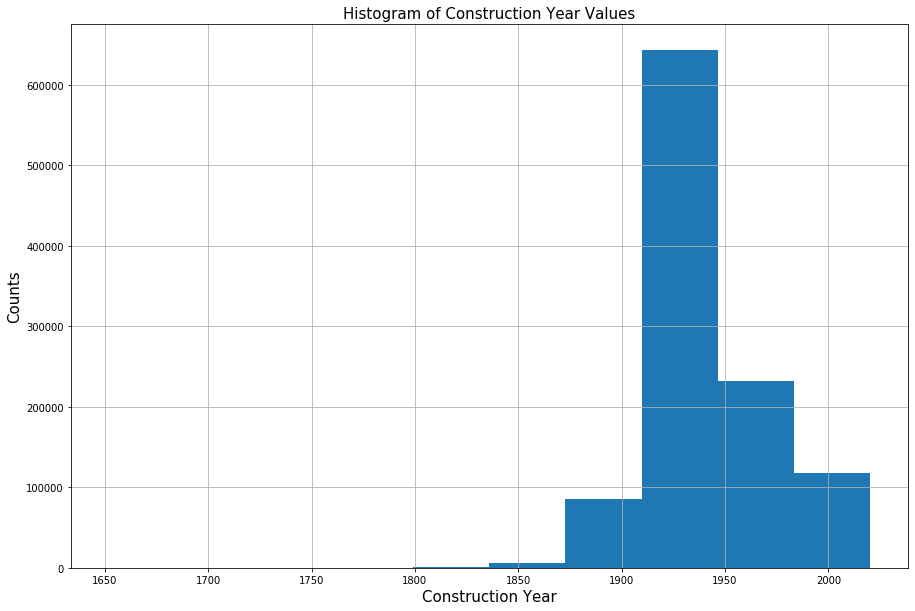

In [51]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(bins=10, figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

Text(0.5, 1.0, 'Histogram of Construction Year Values')

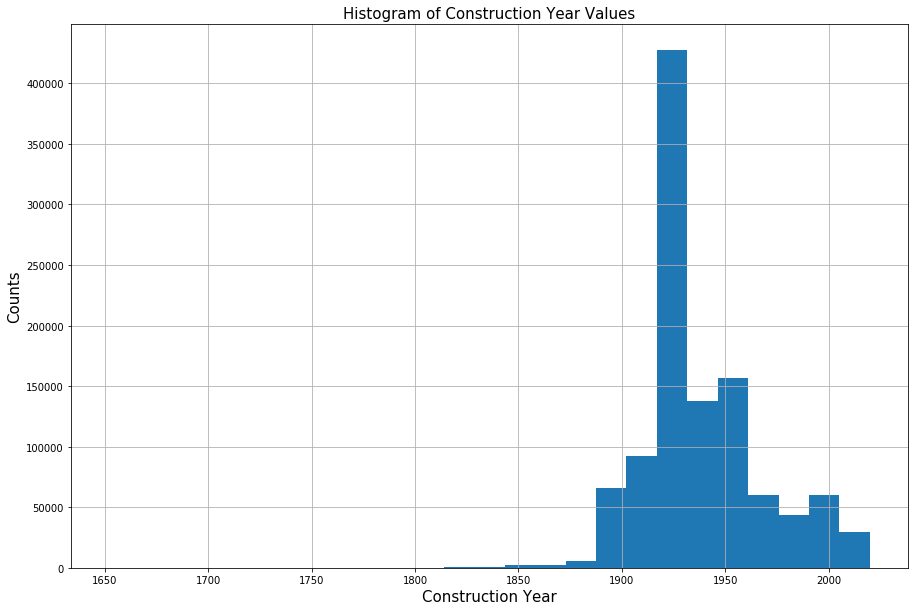

In [52]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
building_footprints['CNSTRCT_YR'].hist(bins=25, figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

Text(0.5, 1.0, 'Histogram of Construction Year Values')

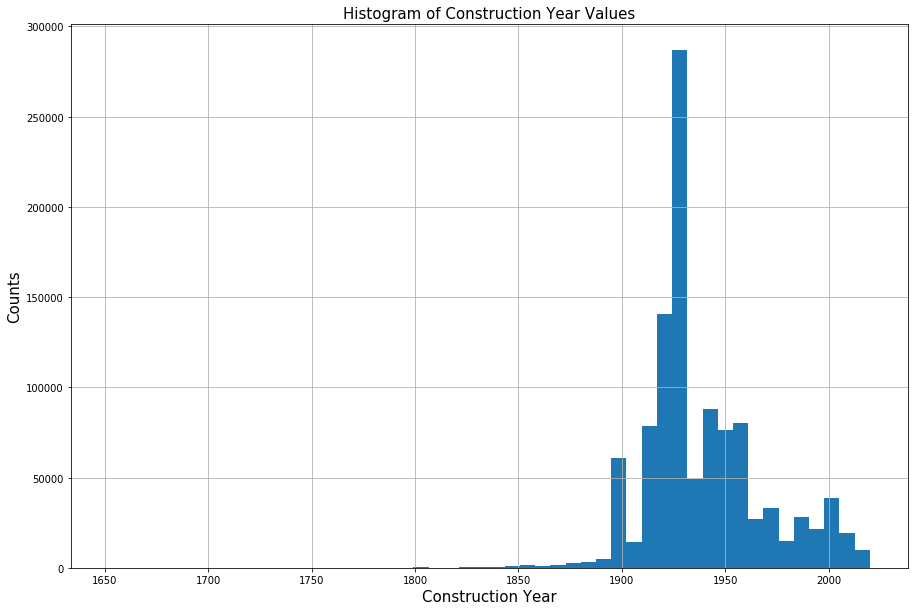

In [53]:
# making a histogram of our 'CNSTRCT_YR' column with 50 bins
building_footprints['CNSTRCT_YR'].hist(bins=50, figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

In [54]:
# printing mean and median of our 'CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].mean())
print(building_footprints['CNSTRCT_YR'].median())

1938.9873681862632
1930.0


# 5. Detecting Outliers

## 5.1 Making a Box Plot

### 5.1.1 Calculating Interquartile Range (IQR)

In [55]:
# printing the 25% and 75% quantiles of our 'CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].quantile(0.25))
print(building_footprints['CNSTRCT_YR'].quantile(0.75))

1920.0
1955.0


In [56]:
# saving the 25% (i.e. Q1) and 75% (i.e. Q3) quantiles of our 'CNSTRCT_YR' column
Q1 = building_footprints['CNSTRCT_YR'].quantile(0.25)
Q3 = building_footprints['CNSTRCT_YR'].quantile(0.75)

# Computing the interquartile range (IQR)
IQR = Q3 - Q1

In [57]:
# printing the IQR of our 'CNSTRCT_YR' column
IQR

35.0

In [58]:
# printing the lower 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q1 - 1.5 * IQR))

# printing the upper 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q3 + 1.5 * IQR))

1867.5
2007.5


### 5.1.2 Box Plot of Construction Year Values

Text(0.5, 1.0, 'Box Plot of Construction Year Value')

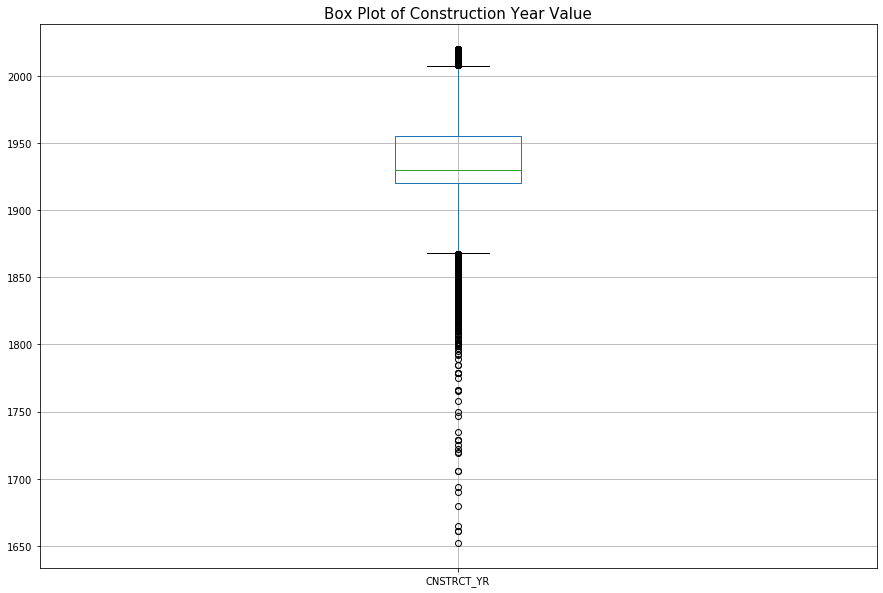

In [59]:
# making a box plot from our 'CNSTRCT_YR' column
CNSTRCT_YR_boxplot = building_footprints.boxplot(column=['CNSTRCT_YR'], figsize=(15,10))
plt.title('Box Plot of Construction Year Value', fontsize=15)

### 5.1.3 Making Histograms of Values Above and Below Box Plot Whiskers

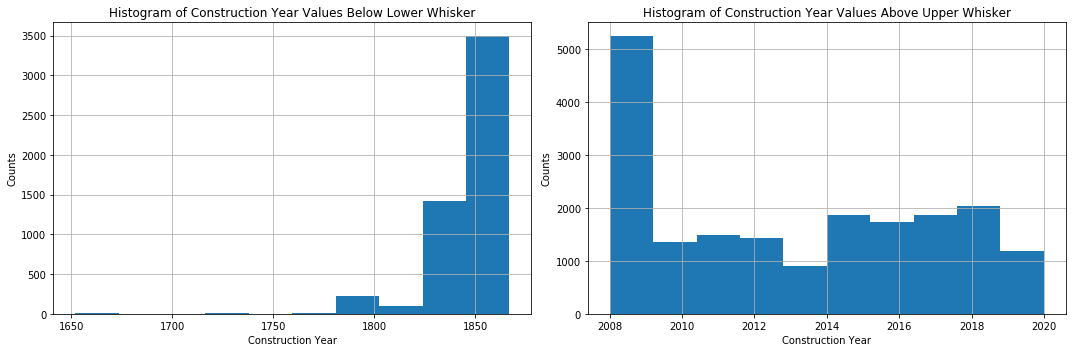

In [60]:
plt.figure(figsize=(15,5))

# identifying values lower than our lower whisker
floor = building_footprints[building_footprints.CNSTRCT_YR < (Q1 - 1.5 * IQR)] 

# identifying values higher than our upper whisker
ceiling = building_footprints[building_footprints.CNSTRCT_YR > (Q3 + 1.5 * IQR)]

#making histograms of these distributions
plt.subplot(121)
floor['CNSTRCT_YR'].hist()
plt.xlabel('Construction Year')
plt.ylabel('Counts')
plt.title('Histogram of Construction Year Values Below Lower Whisker')

plt.subplot(122)
ceiling['CNSTRCT_YR'].hist()
plt.xlabel('Construction Year')
plt.ylabel('Counts')
plt.title('Histogram of Construction Year Values Above Upper Whisker')

plt.tight_layout()

In [61]:
# return counts of unique values in descending order lower than our lower whisker
floor['CNSTRCT_YR'].value_counts()

1855.0    271
1850.0    260
1853.0    248
1854.0    241
1860.0    229
         ... 
1694.0      1
1747.0      1
1775.0      1
1719.0      1
1735.0      1
Name: CNSTRCT_YR, Length: 93, dtype: int64

In [62]:
# return counts of unique values lower than our lower whisker sorted by index (i.e. 'CNSTRCT_YR')
floor['CNSTRCT_YR'].value_counts().sort_index()

1652.0      1
1661.0      2
1665.0      1
1680.0      1
1690.0      1
         ... 
1863.0     67
1864.0    108
1865.0    141
1866.0    152
1867.0    174
Name: CNSTRCT_YR, Length: 93, dtype: int64

In [63]:
# printing the unique values lower than our lower whisker
floor['CNSTRCT_YR'].sort_values().unique()

array([1652., 1661., 1665., 1680., 1690., 1694., 1706., 1719., 1720.,
       1722., 1725., 1729., 1735., 1747., 1750., 1758., 1765., 1766.,
       1775., 1779., 1785., 1789., 1792., 1793., 1795., 1797., 1799.,
       1800., 1801., 1802., 1803., 1804., 1807., 1808., 1809., 1810.,
       1811., 1812., 1813., 1814., 1815., 1816., 1817., 1818., 1819.,
       1820., 1821., 1822., 1823., 1824., 1825., 1826., 1827., 1828.,
       1829., 1830., 1831., 1832., 1833., 1834., 1835., 1836., 1837.,
       1838., 1839., 1840., 1841., 1842., 1843., 1844., 1845., 1846.,
       1847., 1848., 1849., 1850., 1851., 1852., 1853., 1854., 1855.,
       1856., 1857., 1858., 1859., 1860., 1861., 1862., 1863., 1864.,
       1865., 1866., 1867.])

In [64]:
# return counts of unique values in descending order greater than our upper whisker
ceiling['CNSTRCT_YR'].value_counts()

2008.0    3291
2018.0    2044
2009.0    1955
2017.0    1866
2016.0    1742
2011.0    1487
2012.0    1435
2010.0    1366
2015.0    1034
2013.0     897
2014.0     833
2019.0     795
2020.0     394
Name: CNSTRCT_YR, dtype: int64

In [65]:
# previewing first five rows of our data
building_footprints.head()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.87129515296562 40.65717370...,2009.0,NaN,3394646,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3.044521e+09,3.044521e+09,Photogramm
1,MULTIPOLYGON (((-73.87670970144625 40.71425234...,1930.0,NaN,4548330,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4.030640e+09,4.030640e+09,Photogramm
2,MULTIPOLYGON (((-73.85195485799383 40.66235471...,1960.0,NaN,4460479,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4.139430e+09,4.139430e+09,Photogramm
3,MULTIPOLYGON (((-73.94029215265738 40.64108287...,1920.0,NaN,3355684,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3.049720e+09,3.049720e+09,Photogramm
4,MULTIPOLYGON (((-73.98998983552244 40.62383804...,1915.0,NaN,3131737,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3.055100e+09,3.055100e+09,Photogramm


## 5.2. Z-Scores

### 5.2.1 Calculating Z-Scores

In [66]:
# calculating the z score of our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR_zscore'] = (building_footprints.CNSTRCT_YR - building_footprints.CNSTRCT_YR.mean())/building_footprints.CNSTRCT_YR.std()

In [67]:
# making a separate dataframe with only the columns ['CNSTRCT_YR', 'CNSTRCT_YR_zscore']
CNSTRCT_YR_zscore = building_footprints[['CNSTRCT_YR', 'CNSTRCT_YR_zscore']]
CNSTRCT_YR_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
0,2009.0,2.440706
1,1930.0,-0.313308
2,1960.0,0.732520
3,1920.0,-0.661917
4,1915.0,-0.836222


In [68]:
# sorting by CNSTRCT_YR_zscore in ascending order
CNSTRCT_YR_zscore.sort_values(by='CNSTRCT_YR_zscore')

,CNSTRCT_YR,CNSTRCT_YR_zscore
1079368,1652.0,-10.004648
801841,1661.0,-9.690900
483069,1661.0,-9.690900
964878,1665.0,-9.551456
1083906,1680.0,-9.028542
...,...,...
1083691,2020.0,2.824176
1061837,2020.0,2.824176
1083694,2020.0,2.824176
1082903,2020.0,2.824176


In [69]:
# sorting by CNSTRCT_YR_zscore in descending order
CNSTRCT_YR_zscore.sort_values(by='CNSTRCT_YR_zscore', ascending=False)

,CNSTRCT_YR,CNSTRCT_YR_zscore
1084958,2020.0,2.824176
1084121,2020.0,2.824176
1084252,2020.0,2.824176
1084254,2020.0,2.824176
1084256,2020.0,2.824176
...,...,...
1083906,1680.0,-9.028542
964878,1665.0,-9.551456
801841,1661.0,-9.690900
483069,1661.0,-9.690900


In [70]:
len(CNSTRCT_YR_zscore)

1084959

In [71]:
CNSTRCT_YR_zscore.dtypes

CNSTRCT_YR           float64
CNSTRCT_YR_zscore    float64
dtype: object

### 5.2.2 Identifying Possible Outliers from Z-Score

In [72]:
# returning values in 'CNSTRCT_YR_zscore' column not between -3 and 3
outside_zscore = CNSTRCT_YR_zscore[~CNSTRCT_YR_zscore['CNSTRCT_YR_zscore'].between(-3, 3, inclusive=True)]

In [73]:
# previewing first five rows 
outside_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
3246,1843.0,-3.346209
6666,1850.0,-3.102183
9199,1850.0,-3.102183
11124,1850.0,-3.102183
11434,1836.0,-3.590236


In [74]:
# previewing first five rows 
outside_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
3246,1843.0,-3.346209
6666,1850.0,-3.102183
9199,1850.0,-3.102183
11124,1850.0,-3.102183
11434,1836.0,-3.590236


In [75]:
# sorting values in 'CNSTRCT_YR_zscore' in ascending order
outside_zscore.sort_values(by='CNSTRCT_YR_zscore')

,CNSTRCT_YR,CNSTRCT_YR_zscore
1079368,1652.0,-10.004648
801841,1661.0,-9.690900
483069,1661.0,-9.690900
964878,1665.0,-9.551456
1083906,1680.0,-9.028542
...,...,...
1078530,1852.0,-3.032461
498843,1852.0,-3.032461
505226,1852.0,-3.032461
1069623,1852.0,-3.032461


In [76]:
# sorting values in 'CNSTRCT_YR_zscore' in descending order
outside_zscore.sort_values(by='CNSTRCT_YR_zscore', ascending=False)

,CNSTRCT_YR,CNSTRCT_YR_zscore
1076031,1852.0,-3.032461
1080971,1852.0,-3.032461
772189,1852.0,-3.032461
1068179,1852.0,-3.032461
1075382,1852.0,-3.032461
...,...,...
1083906,1680.0,-9.028542
964878,1665.0,-9.551456
483069,1661.0,-9.690900
801841,1661.0,-9.690900


In [77]:
# printing number of rows
len(outside_zscore)

2926

### 5.2.3 Making Histograms of Construction Year Raw and Normalized (Z-Score) Values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1232c6748>,
      dtype=object)

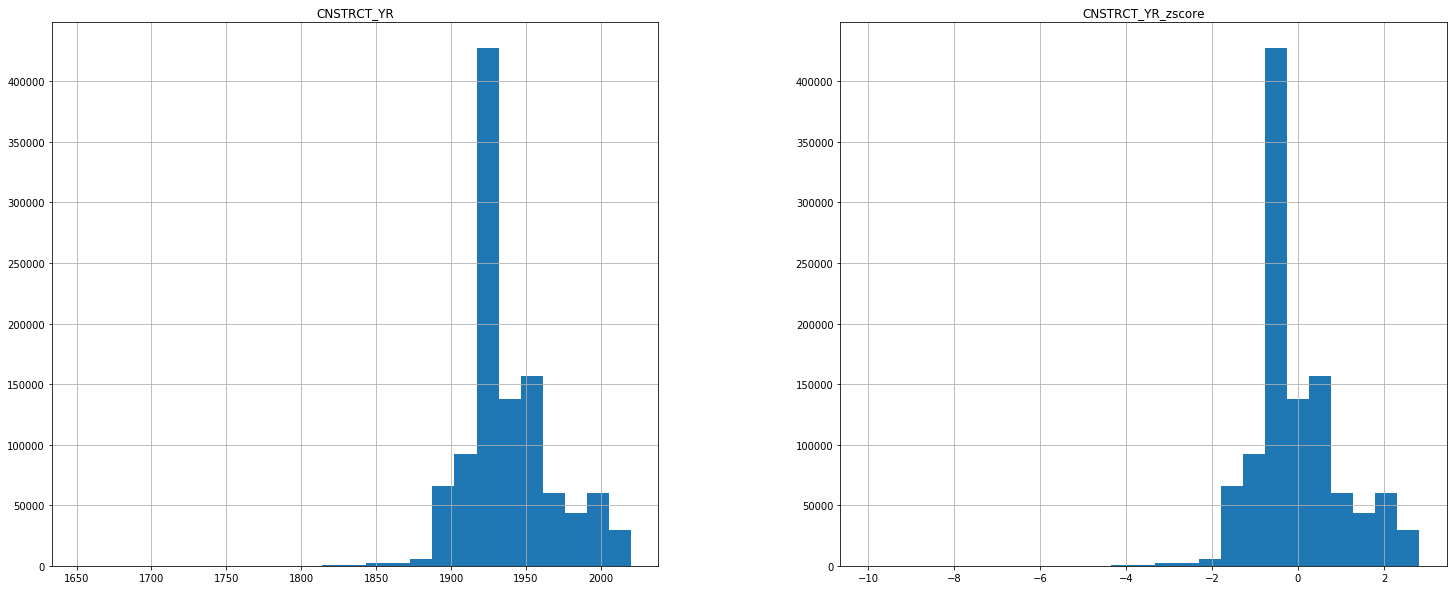

In [78]:
# making histograms of the distributions of both columns
CNSTRCT_YR_zscore.hist(bins=25, figsize=(25,10))

In [79]:
# previewing the first five rows of entire dataframe
building_footprints.head()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,CNSTRCT_YR_zscore
0,MULTIPOLYGON (((-73.87129515296562 40.65717370...,2009.0,NaN,3394646,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3.044521e+09,3.044521e+09,Photogramm,2.440706
1,MULTIPOLYGON (((-73.87670970144625 40.71425234...,1930.0,NaN,4548330,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4.030640e+09,4.030640e+09,Photogramm,-0.313308
2,MULTIPOLYGON (((-73.85195485799383 40.66235471...,1960.0,NaN,4460479,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4.139430e+09,4.139430e+09,Photogramm,0.732520
3,MULTIPOLYGON (((-73.94029215265738 40.64108287...,1920.0,NaN,3355684,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3.049720e+09,3.049720e+09,Photogramm,-0.661917
4,MULTIPOLYGON (((-73.98998983552244 40.62383804...,1915.0,NaN,3131737,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3.055100e+09,3.055100e+09,Photogramm,-0.836222


In [80]:
# previewing the last five rows of entire dataframe
building_footprints.tail()

,the_geom,CNSTRCT_YR,NAME,BIN,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,CNSTRCT_YR_zscore
1084954,MULTIPOLYGON (((-74.19445796227131 40.53927900...,1980.0,NaN,5081526,09/18/2020 12:00:00 AM +0000,Alteration,168284,35.0,2100.0,123.0,2869.317259,247.918686,5.063360e+09,5.063360e+09,Other (Man,1.429739
1084955,MULTIPOLYGON (((-73.95732983152737 40.63563775...,2020.0,NaN,3426611,09/17/2020 12:00:00 AM +0000,Constructed,1293102,75.0,2100.0,26.0,3873.555738,292.361111,3.052200e+09,3.052200e+09,Other (Man,2.824176
1084956,MULTIPOLYGON (((-73.86959847028427 40.65700259...,2017.0,NaN,3418144,09/17/2020 12:00:00 AM +0000,Constructed,1292611,15.0,2100.0,14.0,643.367828,106.263690,3.045861e+09,NaN,Other (Man,2.719593
1084957,MULTIPOLYGON (((-74.19368057016453 40.53947895...,1980.0,NaN,5081529,09/18/2020 12:00:00 AM +0000,Alteration,308899,28.0,2100.0,120.0,2679.415233,216.697399,5.063360e+09,5.063360e+09,Other (Man,1.429739
1084958,MULTIPOLYGON (((-74.19405636715909 40.53927738...,2020.0,NaN,5171437,09/18/2020 12:00:00 AM +0000,Constructed,1293108,34.0,2100.0,122.0,1650.589979,168.615080,5.063360e+09,5.063360e+09,Other (Man,2.824176


In [81]:
# printing the dimensions (i.e. rows, columns) of entire dataframe
building_footprints.shape

(1084959, 16)

# 6. Conclusion

In this notebook, we reviewed various ways to inspect, clean, wrangle, and detect any outliers in your data.  Specifically, we focused on ways to inspect the shape (number of rows, columns) of your data, fill in or replace incorrect values with the median, and detect outliers with box plots and z-scores. This step is crucial if you are interested in modeling or predicting future values.. In Part III, we will focus on data visualization.